<a href="https://colab.research.google.com/github/PrakashBaire/ANN_CNN_Deep_Learning/blob/main/Car_VS_Dogs_CNN_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/praka/OneDrive/Documents/ML_Practice/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/praka/OneDrive/Documents/ML_Practice/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 57s 225ms/step - loss: 0.6748 - accuracy: 0.5815 - val_loss: 0.6302 - val_accuracy: 0.6300
Epoch 2/25
250/250 [==============================] - 50s 199ms/step - loss: 0.6209 - accuracy: 0.6597 - val_loss: 0.5773 - val_accuracy: 0.7050
Epoch 3/25
250/250 [==============================] - 49s 194ms/step - loss: 0.5660 - accuracy: 0.7078 - val_loss: 0.5412 - val_accuracy: 0.7410
Epoch 4/25
250/250 [==============================] - 55s 221ms/step - loss: 0.5277 - accuracy: 0.7389 - val_loss: 0.5182 - val_accuracy: 0.7450
Epoch 5/25
250/250 [==============================] - 50s 202ms/step - loss: 0.5061 - accuracy: 0.7501 - val_loss: 0.5289 - val_accuracy: 0.7445
Epoch 6/25
250/250 [==============================] - 51s 204ms/step - loss: 0.4848 - accuracy: 0.7670 - val_loss: 0.4963 - val_accuracy: 0.7605
Epoch 7/25
250/250 [==============================] - 48s 191ms/step - loss: 0.4759 - accuracy: 0.7716 - val_loss: 0.5237 - val_ac

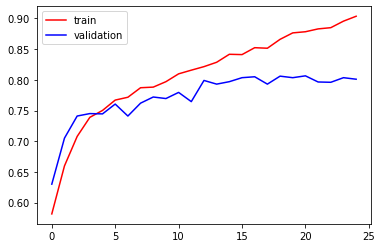

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

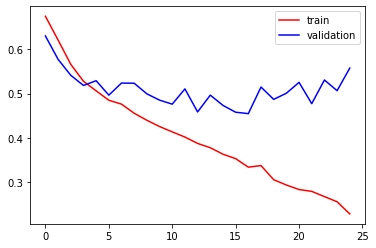

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()